<a href="https://colab.research.google.com/github/RaoSaeed836/100_Day-s_DL/blob/main/Early_Stoping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential

import seaborn as sns

In [ ]:
X,y=make_circles(n_samples=100,noise=0.1,random_state=1)

In [ ]:
# sns.scatterplot(X[:,0],X[:,1],hue=y)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [ ]:
model=Sequential()
model.add(Dense(240,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

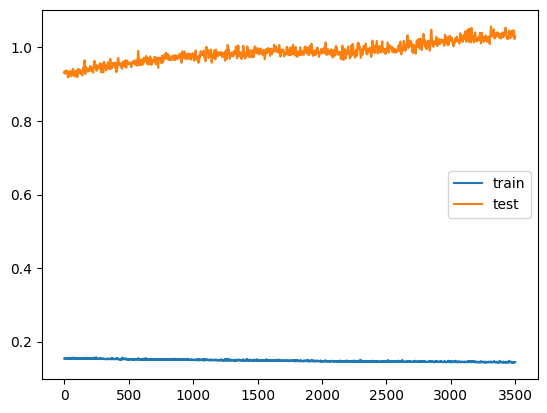

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


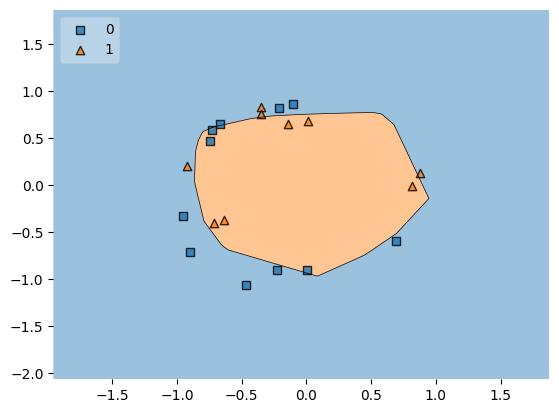

In [ ]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

###Early stoping

In [ ]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 477ms/step - accuracy: 0.5500 - loss: 0.6928 - val_accuracy: 0.5500 - val_loss: 0.6969
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4875 - loss: 0.6951 - val_accuracy: 0.4500 - val_loss: 0.6988
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5156 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.7001
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5078 - loss: 0.6942 - val_accuracy: 0.4000 - val_loss: 0.7020
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4570 - loss: 0.6954 - val_accuracy: 0.4000 - val_loss: 0.7036
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5445 - loss: 0.6902 - val_accuracy: 0.4000 - val_loss: 0.7046
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5406 - loss: 0.6904 - val_accuracy: 0.3500 - val_loss: 0.7057
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5227 - loss: 0.6899 - val_accuracy: 0.3500 - 

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()